In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv('dados_limpos.csv', sep=';')

# Visualizar as primeiras linhas
print(df.head())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xea in position 10: invalid continuation byte

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados com a codificação correta
# Tente 'latin-1' ou outra codificação se necessário
try:
    df = pd.read_csv('dados_limpos.csv', sep=';', encoding='latin-1')
except UnicodeDecodeError:
    print("Erro de decodificação com 'latin-1'. Tentando outra codificação, como 'iso-8859-1'.")
    try:
        df = pd.read_csv('dados_limpos.csv', sep=';', encoding='iso-8859-1')
    except UnicodeDecodeError:
        print("Erro de decodificação com 'iso-8859-1'. Considere tentar outras codificações ou verificar o arquivo original.")
        # Você pode adicionar mais tentativas de codificação aqui
        pass # Ou levante o erro final se nenhuma funcionar

# Visualizar as primeiras linhas (apenas se o DataFrame foi carregado com sucesso)
if 'df' in locals():
    print(df.head())

   ID  Idade     Gênero       Nível de Ensino  Área de Formação  \
0   1     28   Feminino             Graduação       Engenharias   
1   2     35   Feminino         Pós-graduação            Exatas   
2   3     31   Feminino         Pós-graduação  Ciências Sociais   
3   4     37   Feminino          Ensino Médio       Engenharias   
4   5     57  Masculino  Fundamental Completo  Ciências Sociais   

  Região onde mora Estado onde mora  Código da Região  
0         Nordeste               PE                 2  
1          Sudeste               RS                 4  
2     Centro-Oeste               RJ                 3  
3              Sul               MG                 5  
4              Sul               SP                 5  


In [5]:
# Informações gerais
print(df.info())

# Estatísticas descritivas
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                500 non-null    int64 
 1   Idade             500 non-null    int64 
 2   Gênero            500 non-null    object
 3   Nível de Ensino   500 non-null    object
 4   Área de Formação  500 non-null    object
 5   Região onde mora  500 non-null    object
 6   Estado onde mora  500 non-null    object
 7   Código da Região  500 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 31.4+ KB
None
                ID       Idade    Gênero       Nível de Ensino  \
count   500.000000  500.000000       500                   500   
unique         NaN         NaN         2                     6   
top            NaN         NaN  Feminino  Fundamental Completo   
freq           NaN         NaN       251                    96   
mean    250.500000   38.830000       NaN          

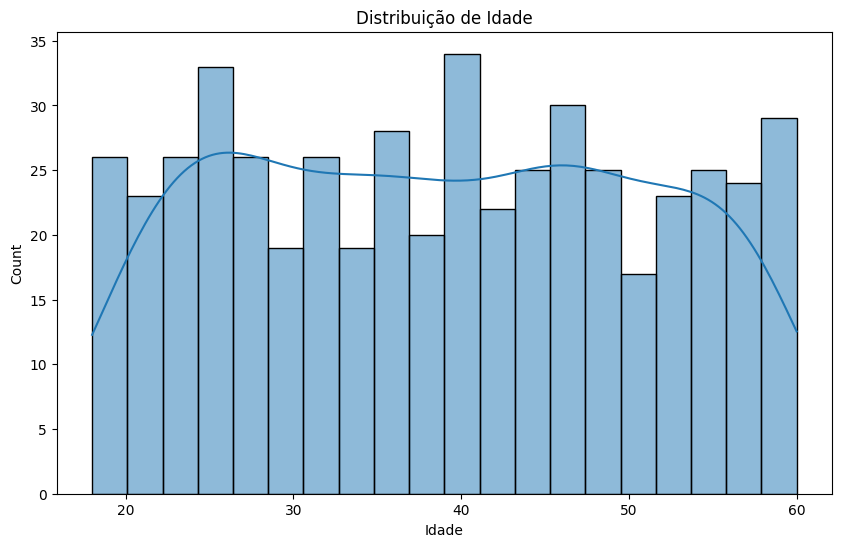

count    500.000000
mean      38.830000
std       12.176438
min       18.000000
25%       28.000000
50%       39.000000
75%       49.000000
max       60.000000
Name: Idade, dtype: float64


In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Idade'], bins=20, kde=True)
plt.title('Distribuição de Idade')
plt.show()

print(df['Idade'].describe())


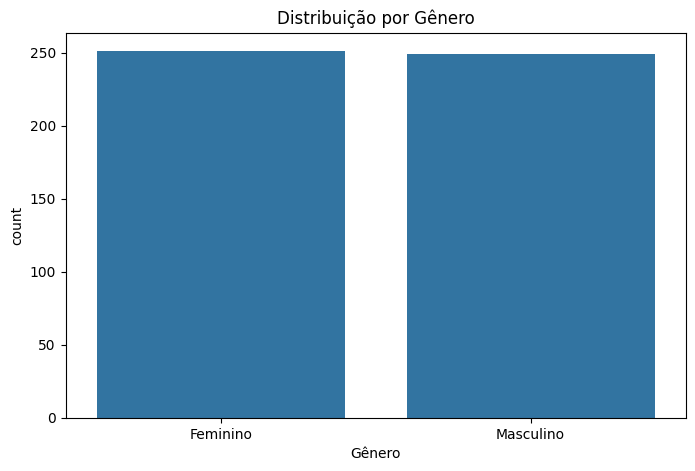

Gênero
Feminino     251
Masculino    249
Name: count, dtype: int64


In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gênero')
plt.title('Distribuição por Gênero')
plt.show()

print(df['Gênero'].value_counts())


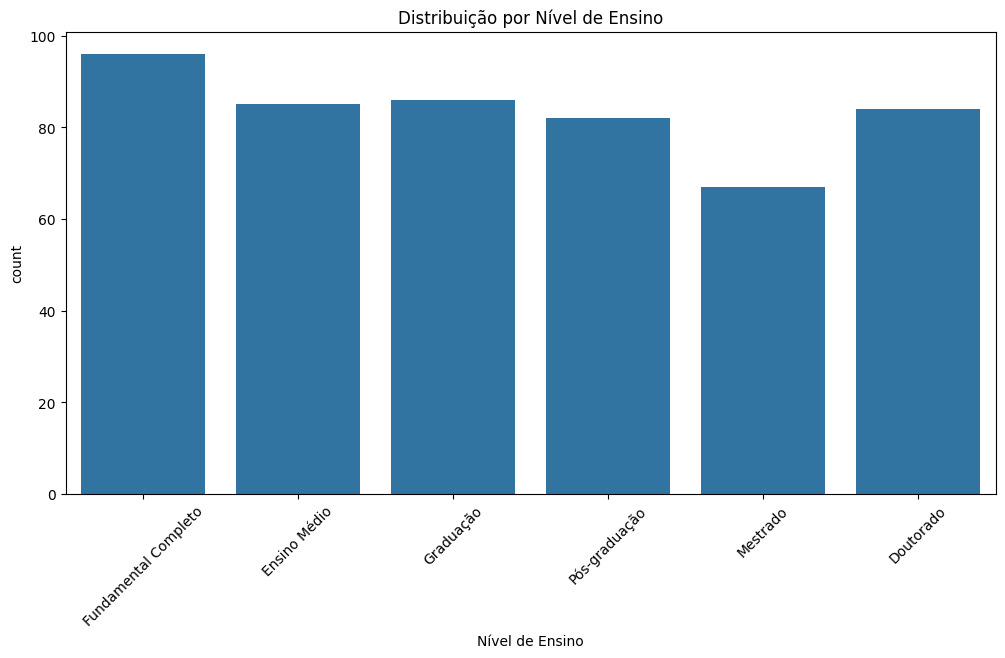

Nível de Ensino
Fundamental Completo    96
Graduação               86
Ensino Médio            85
Doutorado               84
Pós-graduação           82
Mestrado                67
Name: count, dtype: int64


In [8]:
plt.figure(figsize=(12, 6))
order = ['Fundamental Completo', 'Ensino Médio', 'Graduação', 'Pós-graduação', 'Mestrado', 'Doutorado']
sns.countplot(data=df, x='Nível de Ensino', order=order)
plt.title('Distribuição por Nível de Ensino')
plt.xticks(rotation=45)
plt.show()

print(df['Nível de Ensino'].value_counts())


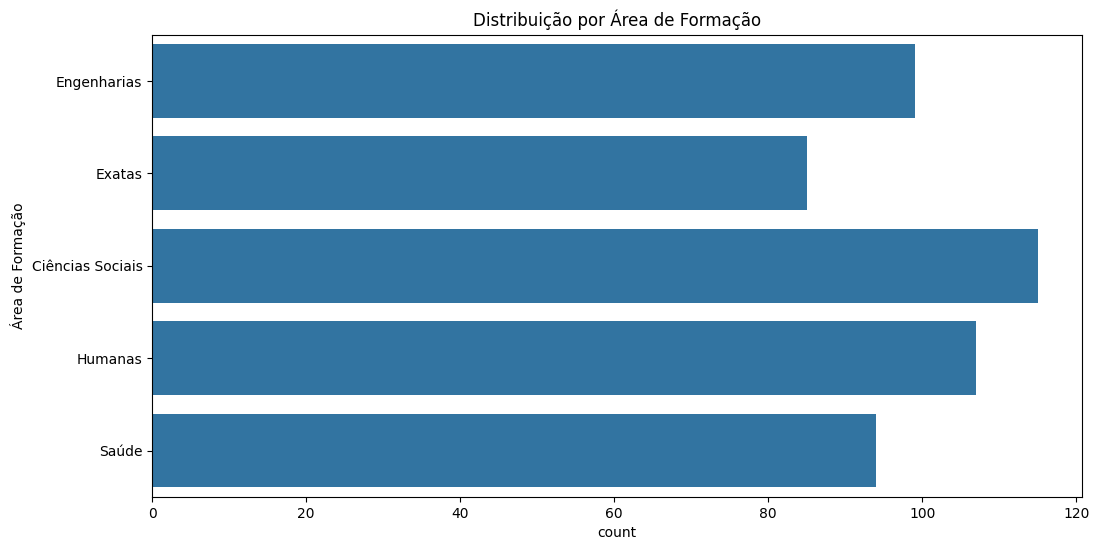

Área de Formação
Ciências Sociais    115
Humanas             107
Engenharias          99
Saúde                94
Exatas               85
Name: count, dtype: int64


In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Área de Formação')
plt.title('Distribuição por Área de Formação')
plt.show()

print(df['Área de Formação'].value_counts())


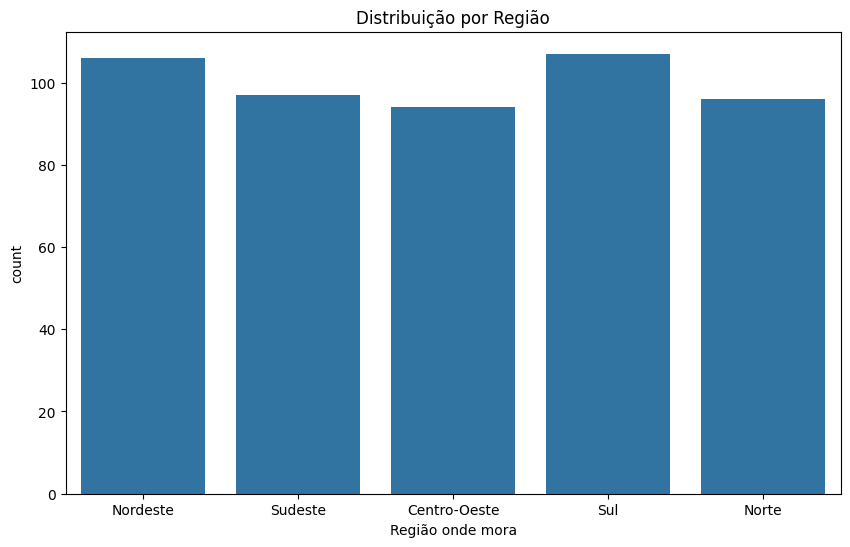

Região onde mora
Sul             107
Nordeste        106
Sudeste          97
Norte            96
Centro-Oeste     94
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Região onde mora')
plt.title('Distribuição por Região')
plt.show()

print(df['Região onde mora'].value_counts())

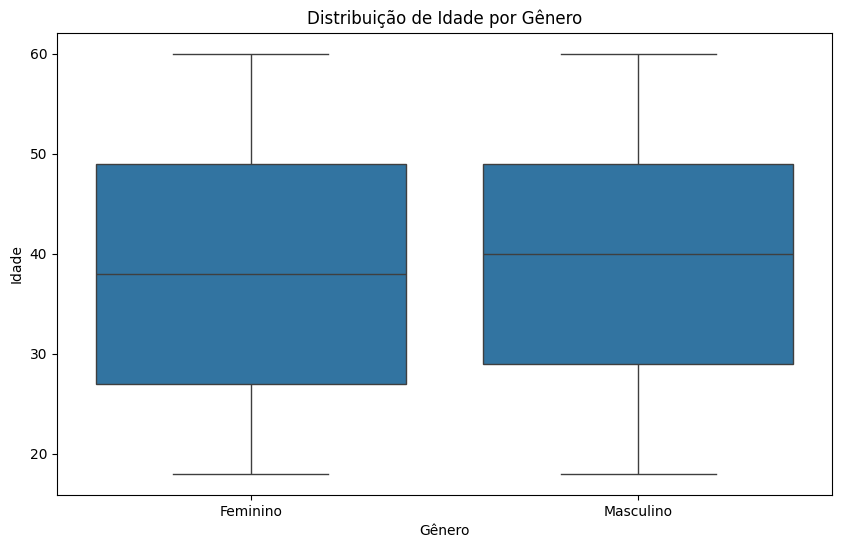

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gênero', y='Idade')
plt.title('Distribuição de Idade por Gênero')
plt.show()

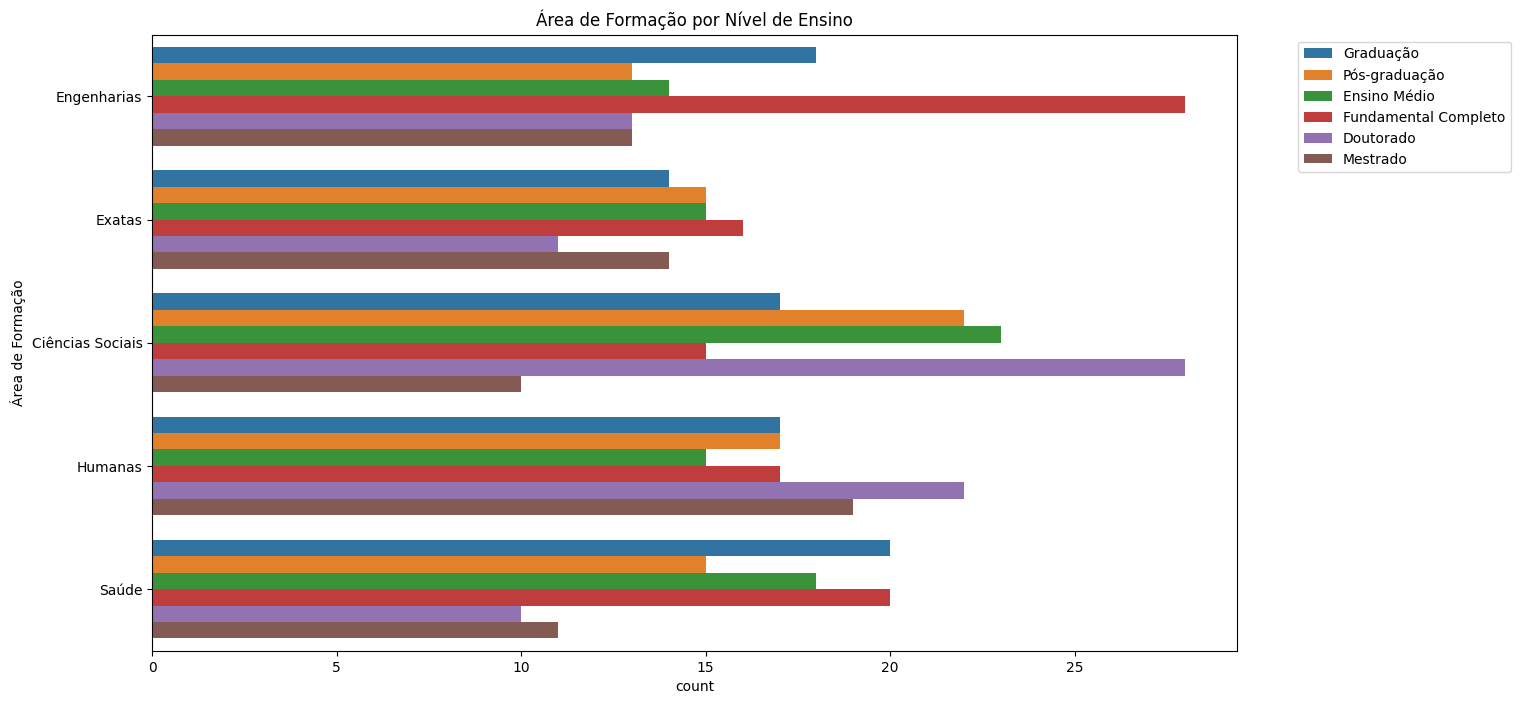

In [12]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='Área de Formação', hue='Nível de Ensino')
plt.title('Área de Formação por Nível de Ensino')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

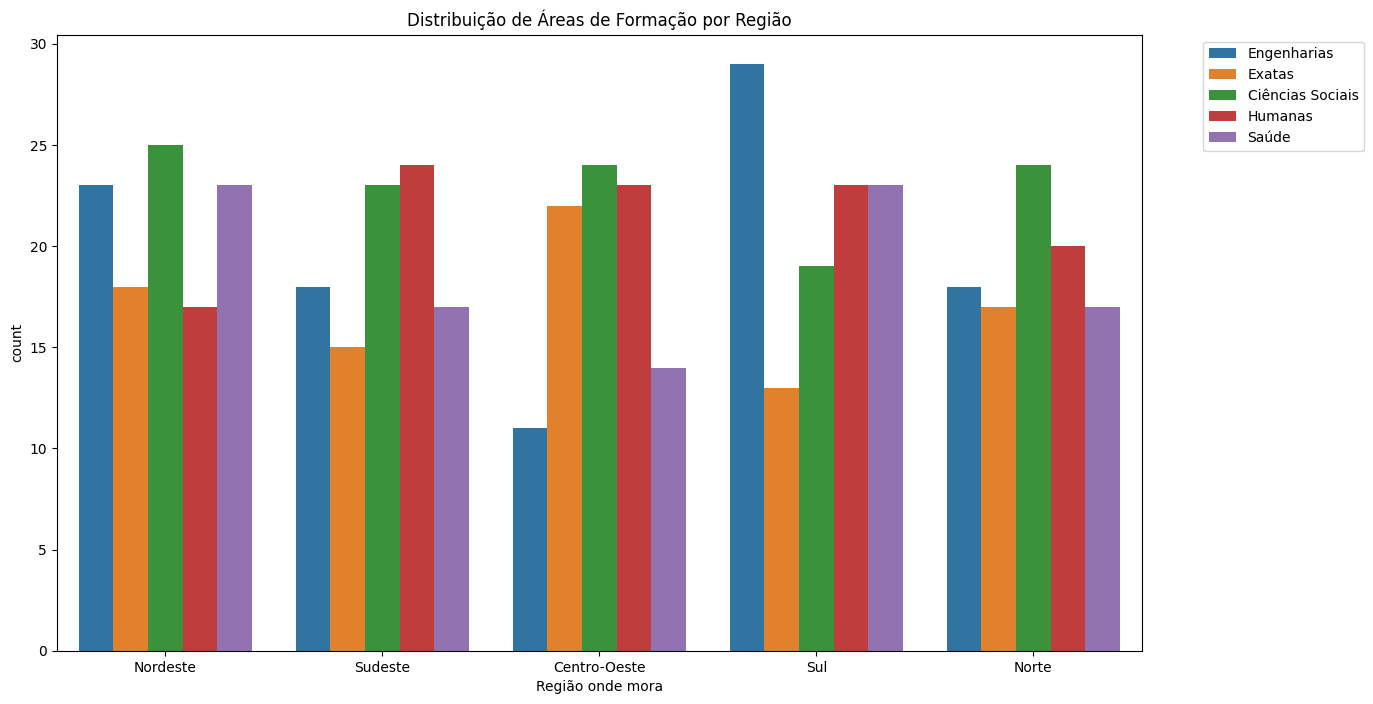

In [13]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Região onde mora', hue='Área de Formação')
plt.title('Distribuição de Áreas de Formação por Região')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

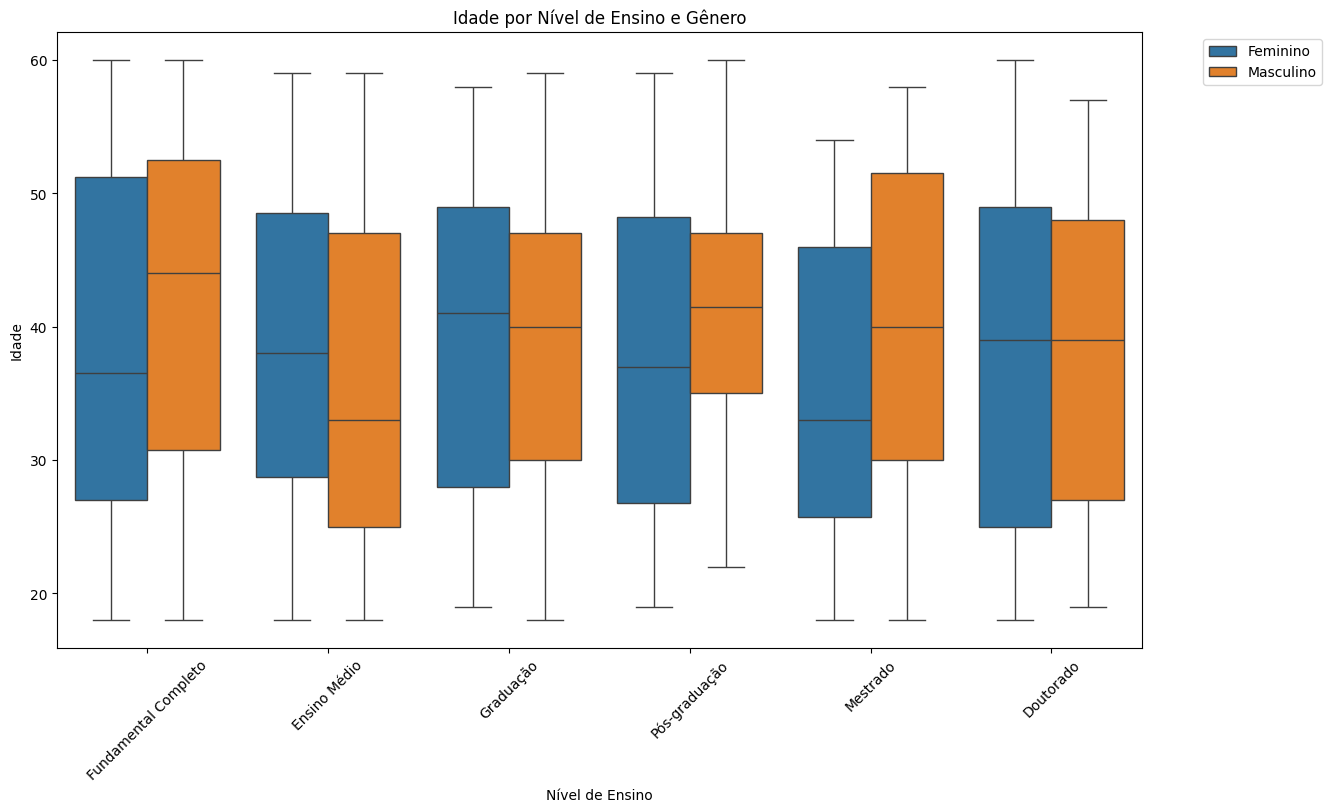

In [14]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Nível de Ensino', y='Idade', hue='Gênero', order=order)
plt.title('Idade por Nível de Ensino e Gênero')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1600x1000 with 0 Axes>

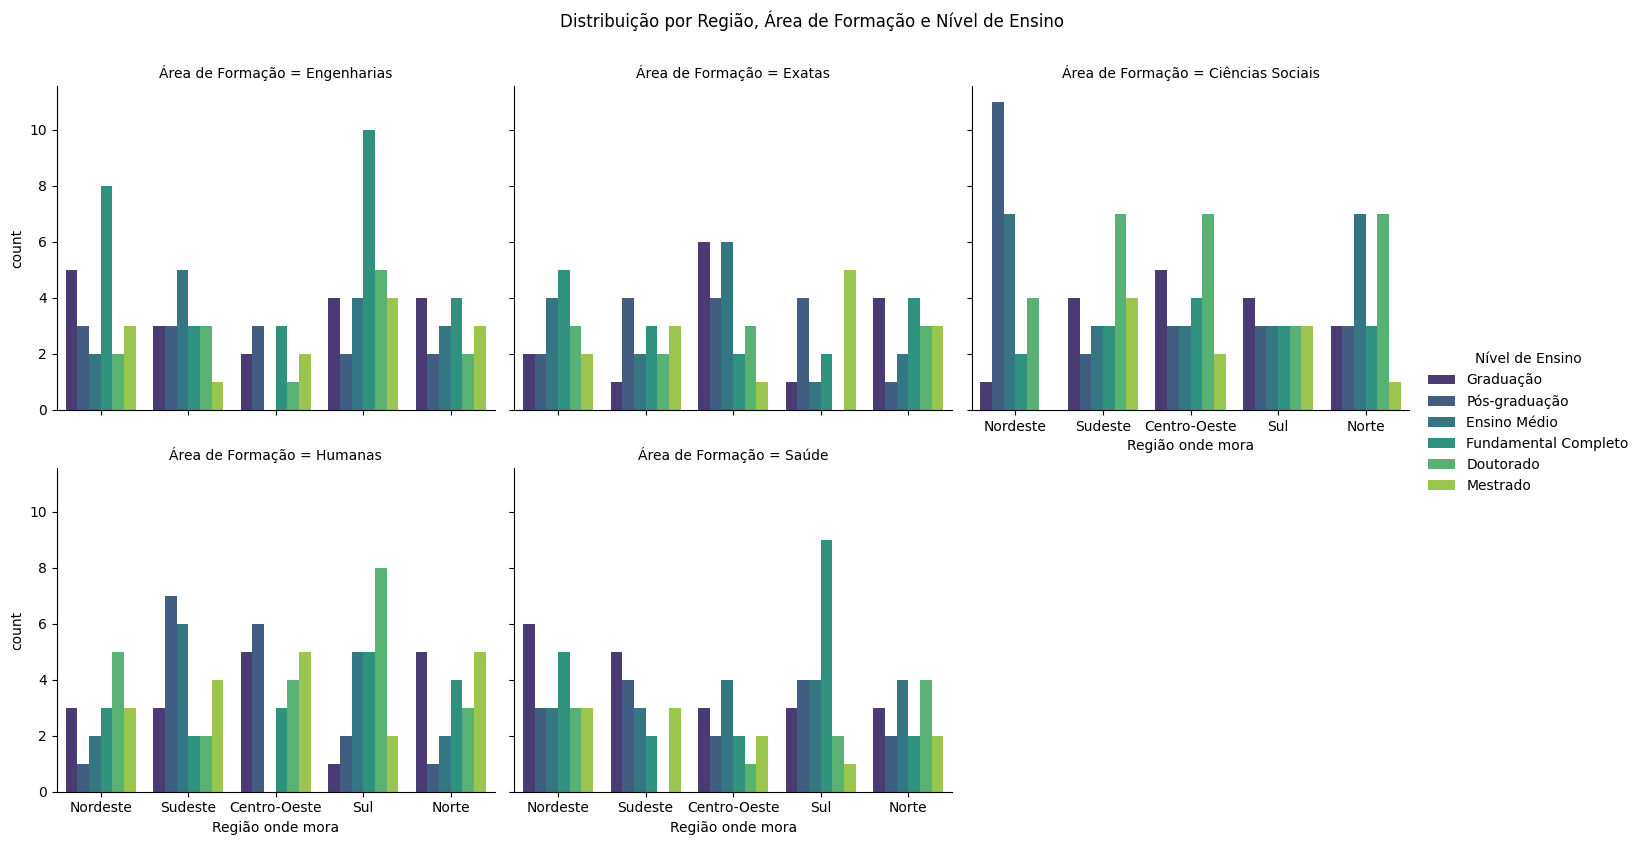

In [15]:
plt.figure(figsize=(16, 10))
sns.catplot(data=df, x='Região onde mora', col='Área de Formação',
            hue='Nível de Ensino', kind='count', col_wrap=3,
            height=4, aspect=1.2, palette='viridis')
plt.suptitle('Distribuição por Região, Área de Formação e Nível de Ensino', y=1.05)
plt.show()

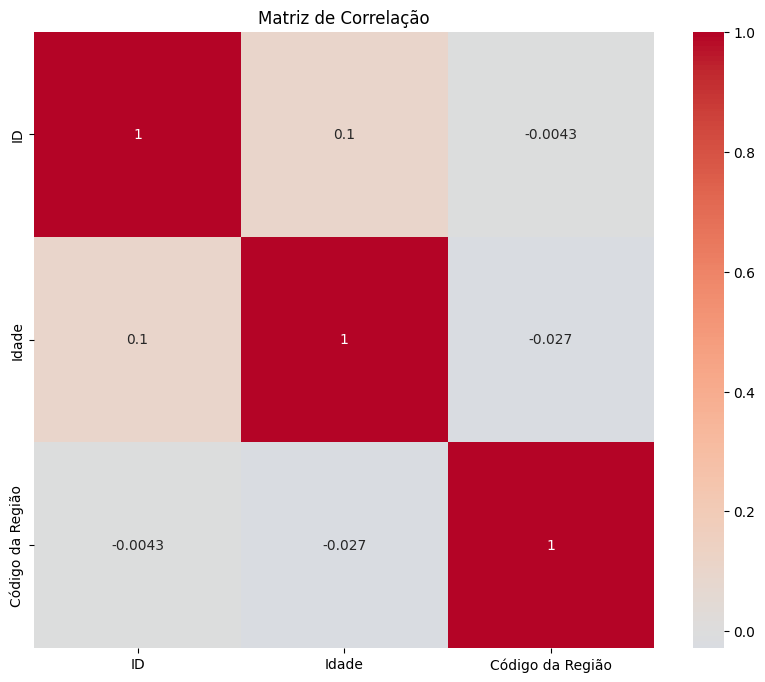

In [16]:
# Criar uma matriz de correlação para variáveis numéricas
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()